In [57]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost

In [2]:
def mse(y,yhat):
    try:
        n = len(y)
    except TypeError:
        n = y.shape[0]
    return (1/n)*sum([(_y-_yhat)**2 for _y, _yhat in zip(y,yhat)])

In [12]:
# Get data
boston = load_boston()

boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset["MEDV"] =  boston.target

# Use only a subset of features for computation time and brain power (Rooms, age, tax and crime rate)
features_to_use = ["RM", "AGE", "TAX", "CRIM", "PTRATIO"]
x_data = boston_dataset[features_to_use]
y_data = boston_dataset.MEDV

x_train, x_notrain, y_train, y_notrain = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_notrain, y_notrain, test_size=0.5, random_state=42)

In [28]:
# Instantiate and fit XGBoost model
regressor = xgboost.XGBRegressor()
regressor.fit(x_train, y_train);

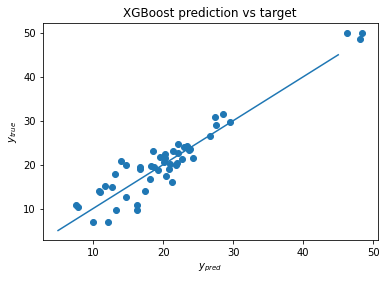

Mean squared error:  8.789421318435156
Mean y_test:  21.029411764705884


In [25]:
# Predict using XGBoost model and plot prediction vs true labels
y_pred_xgb = regressor.predict(x_test)
plt.scatter(y_pred_xgb, y_test)
plt.plot([5,45],[5,45])
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"$y_{true}$")
plt.title("XGBoost prediction vs target")
plt.show()

print("Mean squared error: ", mse(y_test, y_pred_xgb))
print("Mean y_test: ", np.mean(y_test))

In [58]:
# Neural networks usually require preprocessing. Try different things.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Build and fit neural network model (this architecture is a bit random. Play around with it.)
input_shape = x_test.shape[1]
output_shape = 1 # regression
epochs = 200

model = Sequential()
model.add(Dense(5, input_shape=(input_shape,), activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(output_shape, activation="linear"))
model.compile(loss="mse", optimizer=Adam(lr=0.001))

history = model.fit(x_train, y_train, 
          batch_size=20,
          validation_data=(x_val, y_val),
          epochs=epochs, verbose=0)

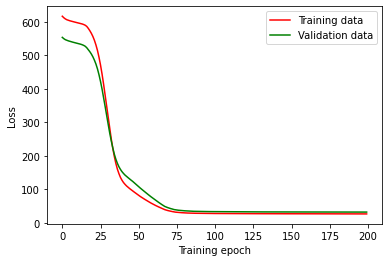

In [59]:
# Plot training history to see at which epoch training should stop 
# (usually when validation loss flattens out while training loss keeps decreasing)
plt.plot(list(range(epochs)), history.history["loss"], c="red", label="Training data")
plt.plot(list(range(epochs)), history.history["val_loss"], c="green", label="Validation data")
plt.xlabel("Training epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

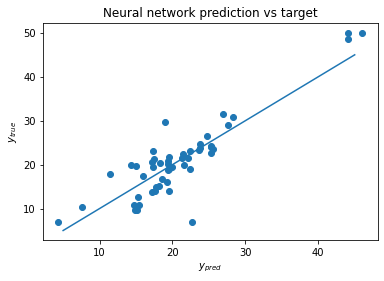

Mean squared error:  17.074160481773276
Mean y_test:  21.029411764705884


In [60]:
# Predict using neural network model and plot prediction vs true labels
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0],)
plt.scatter(y_pred, y_test)
plt.plot([5,45],[5,45])
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"$y_{true}$")
plt.title("Neural network prediction vs target")
plt.show()
print("Mean squared error: ", mse(y_test, y_pred))
print("Mean y_test: ", np.mean(y_test))

In [11]:
# Out of the box, XGBoost performs pretty well while the neural network can struggle.
# Play around with the different layers and see if you can make a good architecture 
# that solves this regression task.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
